In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import altair as alt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import set_config
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [2]:
#reading in the data
URL = urllib2.urlopen("https://databank.worldbank.org/data/download/WDI_CSV.zip").read()
file = ZipFile(BytesIO(URL))
data_csv = file.open("WDIData.csv")
data = pd.read_csv(data_csv)
data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395271,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395272,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.700000,NaN,NaN,NaN,5.400000,NaN,NaN,NaN,NaN
395273,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,32.400000,NaN,NaN,NaN,33.700000,NaN,NaN,NaN,NaN
395274,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,59.400000,59.500000,59.700000,59.900000,60.100000,60.300000,60.500000,60.700000,NaN,NaN


In [3]:
# data2= data[['Country Name', 'Indicator Name', '2015']]
data3=pd.pivot_table(data, index= 'Country Name', values='2015', columns='Indicator Name')
data3.columns

data4= data3[['Access to electricity (% of population)', 'Adjusted savings: carbon dioxide damage (current US$)', 
             'Adjusted net national income (constant 2015 US$)', 'Adjusted savings: carbon dioxide damage (current US$)'
             ,'Agricultural land (% of land area)', 'CO2 emissions (kt)', 'Death rate, crude (per 1,000 people)'
              ,'Land area (sq. km)','Methane emissions (kt of CO2 equivalent)',
             'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)','Population, total','Renewable energy consumption (% of total final energy consumption)',
             'Renewable electricity output (% of total electricity output)','Rural population']]

numeric_feats= ['Access to electricity (% of population)', 'Adjusted savings: carbon dioxide damage (current US$)', 
             'Adjusted net national income (constant 2015 US$)', 'Adjusted savings: carbon dioxide damage (current US$)'
             ,'Agricultural land (% of land area)', 'CO2 emissions (kt)', 'Death rate, crude (per 1,000 people)'
              ,'Land area (sq. km)','Methane emissions (kt of CO2 equivalent)',
             'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)','Population, total','Renewable energy consumption (% of total final energy consumption)',
             'Rural population']

In [13]:
data4=data4.fillna(0)

<Axes: xlabel='Death rate, crude (per 1,000 people)', ylabel='Renewable electricity output (% of total electricity output)'>

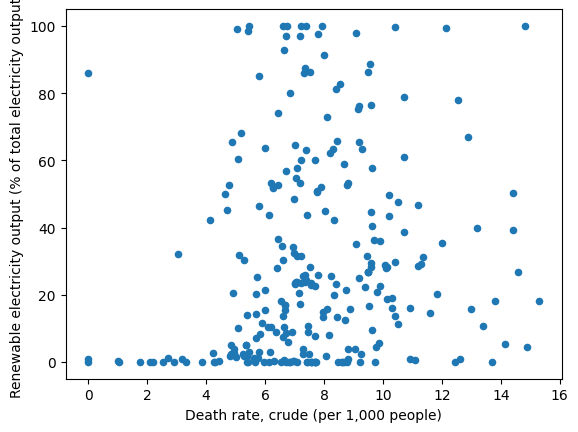

In [14]:
data4.plot.scatter(x='Death rate, crude (per 1,000 people)', y='Renewable electricity output (% of total electricity output)')

In [15]:
#split data into training and testing

energy_train, energy_test= train_test_split(data4, train_size=0.75)


energy_train_x= energy_train.drop('Renewable electricity output (% of total electricity output)', axis=1)
energy_train_y= energy_train[["Renewable electricity output (% of total electricity output)"]]

energy_test_x= energy_test.drop('Renewable electricity output (% of total electricity output)', axis=1)
energy_test_y= energy_test[["Renewable electricity output (% of total electricity output)"]]





In [16]:
# ct = make_column_transformer(    
#     (StandardScaler(), numeric_feats))

# ct.fit_transform(energy_train_x)

energy_train_x=energy_train_x.fillna(0)
energy_train_y= energy_train_y.fillna(0)

energy_train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, Europe & Central Asia (excluding high income) to Myanmar
Data columns (total 13 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Access to electricity (% of population)                                 198 non-null    float64
 1   Adjusted savings: carbon dioxide damage (current US$)                   198 non-null    float64
 2   Adjusted net national income (constant 2015 US$)                        198 non-null    float64
 3   Adjusted savings: carbon dioxide damage (current US$)                   198 non-null    float64
 4   Agricultural land (% of land area)                                      198 non-null    float64
 5   CO2 emissions (kt)                                                      198 non-null    float64
 6   Death rate, crude (per 1,000 people)   

In [17]:
#making the linear model
lm=LinearRegression()
lm.fit(energy_train_x, energy_train_y)

LinearRegression()

In [18]:
#predict on test 
lm.score(energy_test_x,energy_test_y)


0.43924028932368486